In [102]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import yake
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [103]:
data = pd.read_csv('zomatoData.csv')

In [46]:
data

,Name,Address,Phone,Rating,AvgCost,Known For,Popular Dishes,Cuisine,Reviews,Location
0,Pizza Hut,"17 & 18, Corner Market, Malviya Nagar, New Delhi",918929647587,3.7,800,Casual Seating Area|Prompt Service|Reasonable ...,NaN,Pizza|Fast Food|Pasta|Beverages|Desserts|,Dining|Delivery|Casual Seating Area|Prompt Ser...,South Delhi
1,RollsKing,"Shop 2, 10/127, Malviya Nagar, New Delhi",919560101636,3.9,300,Pocket Friendly|Tasty|Contactless Delivery|Bes...,NaN,Rolls|Fast Food|North Indian|Beverages|,Dining|Delivery|Pocket Friendly|Tasty|Contactl...,South Delhi
2,Punjabi Angithi,"84, Ground Floor, Left Corner, Behind Hero Sho...",911149952492,4.0,200,Fast Delivery Service|Cute Packaging|Food Pres...,Chilly Momo|Veg Noodles|Dal|Momos|,North Indian|Chinese|Rolls|Momos|Street Food|P...,Chilly Momo|Veg Noodles|Dal|Momos|Fast Deliver...,South Delhi
3,Chicago Pizza,"8-A, Hauz Khas Village, New Delhi",919540937301,3.7,700,Comforting Atmosphere|Spill Proof Packaging|Fr...,Paneer Delight Pizza|Chicago Pizza|Pizzas|Drink|,Pizza|Fast Food|,Dining|Delivery|Paneer Delight Pizza|Chicago P...,South Delhi
4,BOX8 - Desi Meals,"F5, Ground Floor, Gautam Nagar, Gulmohar Park ...",918068172526,4.3,250,Customizable Food|Good Taste|Elaborate Menu|Fr...,NaN,North Indian|Biryani|Desserts|,Customizable Food|Good Taste|Elaborate Menu|Fr...,South Delhi
...,...,...,...,...,...,...,...,...,...,...
196,Hira Sweets,"K 19/21, Connaught Place, New Delhi",919136587253,4.2,500,South Indian Menu|Nice/Colourful Packaging|Par...,Paneer Dhokla|Kalakand|Deluxe Thali|Rasgulla|R...,Mithai|North Indian|South Indian|Chinese|Stree...,Dining|Delivery|Paneer Dhokla|Kalakand|Deluxe ...,Central Delhi
197,Sandoz,"L-9, Ground Floor, Connaught Place, New Delhi",918595951359,4.2,800,Good Staffs|Seating Inside|Quantity of Portion...,Fruit Punch Mocktail|Bhatti Chicken|Handi Chic...,North Indian|Chinese|Fast Food|Mughlai|Rolls|C...,Dining|Delivery|Fruit Punch Mocktail|Bhatti Ch...,Central Delhi
198,Sita Ram Diwan Chand,"2243, Chuna Mandi, Raj Guru Road, Paharganj, N...",911123587380,4.1,0,Paneer Bhatura|Meethi Lassi|Chana Kulcha|Chola...,Legendary choley bhature|,North Indian|,Dining|Delivery|Paneer Bhatura|Meethi Lassi|Ch...,Central Delhi
199,Swagat Dhaba,"5137, Main Bazaar, Paharganj, New Delhi",918929734255,4.1,300,Wonderful Presentation|Proper Packaging|Timely...,NaN,North Indian|,Dining|Delivery|Wonderful Presentation|Proper ...,Central Delhi


In [12]:
sentiment = SentimentIntensityAnalyzer()

In [2]:
kw_extractor = yake.KeywordExtractor()

In [29]:
language = "en"
max_ngram_size = 5
# deduplication_threshold = 0.1
numOfKeywords = 3
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, top=numOfKeywords, features=None)

In [30]:
kewords = []
for index, row in data.iterrows():
    text = row['Cuisine']
    keywords = custom_kw_extractor.extract_keywords(text)
    print("Keywords:", keywords)

    print()

Keywords: [('Fast Food', 0.007444681613352736), ('Pasta', 0.030396371632413578), ('Beverages', 0.030396371632413578)]

Keywords: [('Fast Food', 0.007444681613352736), ('North Indian', 0.007444681613352736), ('Beverages', 0.030396371632413578)]

Keywords: [('Street Food', 0.007444681613352736), ('North Indian', 0.013797198203993007), ('Chinese', 0.030396371632413578)]

Keywords: [('Fast Food', 0.007444681613352736), ('Pizza', 0.04491197687864554), ('Fast', 0.08596317751626563)]

Keywords: [('North Indian', 0.013797198203993007), ('Biryani', 0.030396371632413578), ('Desserts', 0.030396371632413578)]

Keywords: [('South Indian', 0.005054675135023648), ('North Indian', 0.009389035497378928), ('Indian', 0.03880781492529434)]

Keywords: [('North Indian', 0.0038584962387113223), ('Fast Food', 0.004556607981690655), ('Street Food', 0.004556607981690655)]

Keywords: [('Fast Food', 0.007444681613352736), ('Pizza', 0.04491197687864554), ('Fast', 0.08596317751626563)]

Keywords: [('Fast Food', 0.0

In [19]:
for x in keywords:
    print(x)
    print()

In [24]:
data.isna().sum()

Name               0
Address            0
Phone              0
Rating             0
AvgCost            0
Known For         40
Popular Dishes    94
Cuisine           26
Reviews           23
dtype: int64

In [25]:
data.shape

(201, 9)

In [104]:
scaler = MinMaxScaler()
data['Rating'] = scaler.fit_transform(data['Rating'].values.reshape(-1,1))
data['AvgCost'] = scaler.fit_transform(data['AvgCost'].values.reshape(-1,1))

In [110]:
wcss = []
cluster = []

for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data[['Rating', 'AvgCost']])
    wcss.append(kmeans.inertia_)
    cluster.append(i)

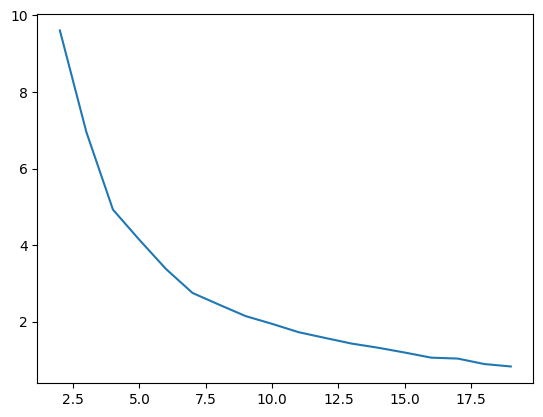

In [111]:
plt.plot(cluster, wcss)

In [116]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(data.loc[:, ['AvgCost', 'Rating']])

In [117]:
data['clusters'] = kmeans.labels_

<AxesSubplot: xlabel='Rating', ylabel='AvgCost'>

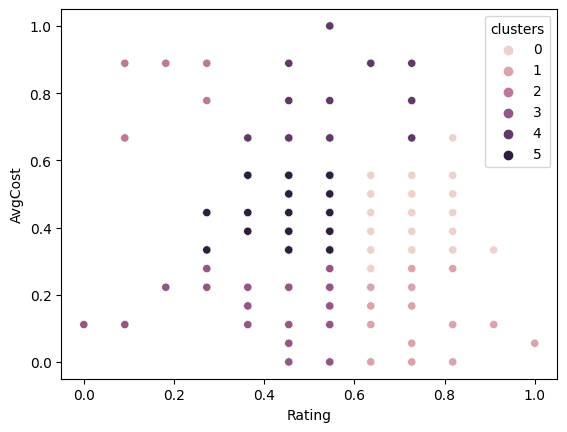

In [118]:
sns.scatterplot(data=data, x='Rating', y='AvgCost', hue='clusters')

In [119]:
d = {0: 'High Rating and Medium Cost', 1: 'High Rating and Low Cost', 2: 'Low Rating and High Cost', 3: 'Low Rating and Low Cost', 4: 'High Rating and High Cost', 5: 'Low Rating and Medium Cost'}

In [120]:
data['cluster_description'] = data['clusters'].map(d)

In [122]:
data.fillna('None', inplace=True)

In [125]:
data.to_csv('updated_data.csv', index=False)